In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
MAX_WORDS = 10000
MAX_LEN = 100 # Отсечение остатка отзывов после 100-го слова
EPOCHS = 15
BATCH_SIZE = 32

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=MAX_WORDS) 
# num_words=10000 означает, что в обучающих данных будет сохранено только 10 000 слов
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
X_train = pad_sequences(train_data, maxlen=MAX_LEN)
x_test = pad_sequences(test_data, maxlen=MAX_LEN)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
model = Sequential([
    Embedding(10000, 8),
    Flatten(),
    Dense(32, activation="relu"), # Функция relu (rectified linear unit — блок линейной ректификации) используется для преобразования отрицательных значений в ноль
    Dense(1, activation="sigmoid"), # сигмоидная функция рассредоточивает произвольные значения по интервалу [0, 1]
])

In [7]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["acc"])

In [8]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_val, y_val))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.6417 - loss: 0.5926 - val_acc: 0.9030 - val_loss: 0.2413
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - acc: 0.9055 - loss: 0.2459 - val_acc: 0.9760 - val_loss: 0.1136
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9638 - loss: 0.1175 - val_acc: 0.9960 - val_loss: 0.0402
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9914 - loss: 0.0396 - val_acc: 0.9960 - val_loss: 0.0178
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9982 - loss: 0.0113 - val_acc: 1.0000 - val_loss: 0.0035
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - acc: 0.9996 - loss: 0.0035 - val_acc: 1.0000 - val_loss: 0.0015
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - acc: 0.9999 - loss: 0.0013 - val_acc: 1.0000 - val_loss: 6.5389e-04
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - acc: 0.9999 - loss: 0.0011 - val_acc: 0.9980 - val_loss: 0.0056
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 8

In [10]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

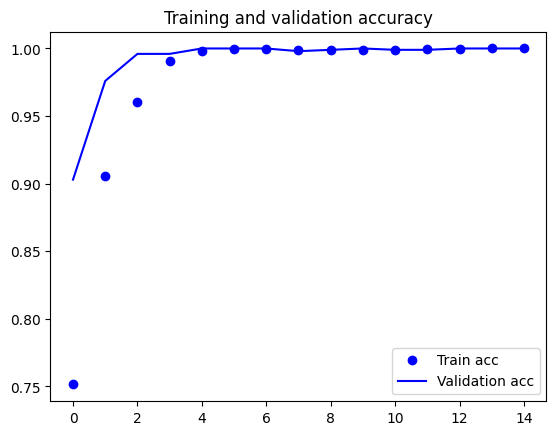

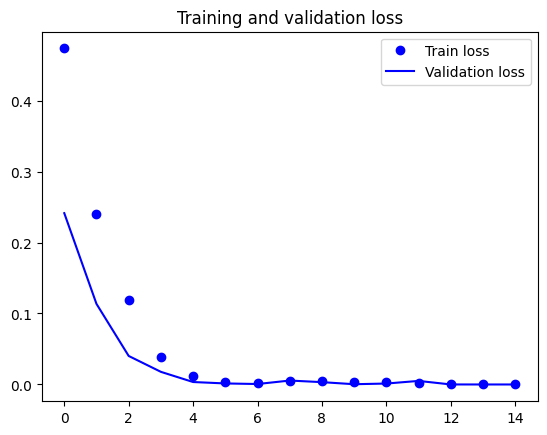

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(acc, 'bo', label='Train acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, 'bo', label='Train loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [12]:
pred = model.predict(x_test)
pred

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step


array([[4.8890581e-07],
       [9.9999964e-01],
       [1.0715476e-01],
       ...,
       [3.3174260e-07],
       [6.1362778e-07],
       [9.3021113e-01]], dtype=float32)

In [13]:
pred_labels = (pred > 0.5).astype(int)


In [14]:
# Загрузка словаря
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Преобразование числовых последовательностей в текст
decoded_reviews = []
for seq in test_data:
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '***') for i in seq])
    decoded_reviews.append(decoded_review)


In [15]:
# Создание DataFrame для всех данных
results = pd.DataFrame({
    'Review': decoded_reviews,
    'True Label': y_test,
    'Predicted Probability': pred.flatten(),
    'Predicted Label': pred_labels.flatten()
})

# Отображение первых 10 строк таблицы
pd.DataFrame(results)

,Review,True Label,Predicted Probability,Predicted Label
0,*** please give this one a miss br br *** *** ...,0.0,4.889058e-07,0
1,*** this film requires a lot of patience becau...,1.0,9.999996e-01,1
2,*** many animation buffs consider *** *** the ...,1.0,1.071548e-01,0
3,*** i generally love this type of movie howeve...,0.0,8.012338e-01,1
4,*** like some other people wrote i'm a die har...,1.0,1.000000e+00,1
...,...,...,...,...
24995,*** the book is better than the film mostly be...,1.0,9.999999e-01,1
24996,*** the largest crowd to ever see a wrestling ...,1.0,9.655787e-01,1
24997,*** i suppose that to say this is an all out t...,0.0,3.317426e-07,0
24998,*** in love 2 is the third movie it seemed tha...,0.0,6.136278e-07,0


In [16]:
def categorize_prediction(prob):
    if prob <= 0.25:
        return "negative"
    elif prob <= 0.5:
        return "moderate"
    elif prob <= 0.75:
        return "good"
    else:
        return "very good"
    
pred_categories = [categorize_prediction(p) for p in pred.flatten()]

In [17]:
# Создание DataFrame для всех данных
results = pd.DataFrame({
    'Review': decoded_reviews,
    'True Label': y_test,
    'Predicted Probability': pred.flatten(),
    'Predicted Category': pred_categories
})

# Отображение первых 10 строк таблицы
pd.DataFrame(results)

,Review,True Label,Predicted Probability,Predicted Category
0,*** please give this one a miss br br *** *** ...,0.0,4.889058e-07,negative
1,*** this film requires a lot of patience becau...,1.0,9.999996e-01,very good
2,*** many animation buffs consider *** *** the ...,1.0,1.071548e-01,negative
3,*** i generally love this type of movie howeve...,0.0,8.012338e-01,very good
4,*** like some other people wrote i'm a die har...,1.0,1.000000e+00,very good
...,...,...,...,...
24995,*** the book is better than the film mostly be...,1.0,9.999999e-01,very good
24996,*** the largest crowd to ever see a wrestling ...,1.0,9.655787e-01,very good
24997,*** i suppose that to say this is an all out t...,0.0,3.317426e-07,negative
24998,*** in love 2 is the third movie it seemed tha...,0.0,6.136278e-07,negative
